In [30]:

import numpy as np
X = [50, 60, 70, 80, 90]
y = [150, 180, 210, 240, 270]

X = np.array([50, 60, 70, 80, 90])
y = np.array([150, 180, 210, 240, 270])
X = (X - np.mean(X)) / np.std(X)

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    
    def __init__(self, learning_rate=0.001, n_iters=1000,
                 degree=1, regularization=None, lambda_=0):
        
        self.lr = learning_rate
        self.n_iters = n_iters
        self.degree = degree
        self.regularization = regularization
        self.lambda_ = lambda_
        self.theta = None
        self.loss_history = []
    
    # -----------------------------
    # Polynomial Feature Expansion
    # -----------------------------
    def _polynomial_features(self, X):
        X_poly = np.ones((len(X), 1)) 
        
        for d in range(1, self.degree + 1):
            X_poly = np.c_[X_poly, X**d]
            
        return X_poly
    
    # -----------------------------
    # Fit
    # -----------------------------
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        X_poly = self._polynomial_features(X)
        n_samples, n_features = X_poly.shape
        
        self.theta = np.zeros(n_features)
        
        for _ in range(self.n_iters):
            y_pred = X_poly.dot(self.theta)
            error = y_pred - y
            
            # Gradient
            gradient = (2/n_samples) * X_poly.T.dot(error)
            
            # Regularization
            if self.regularization == 'ridge':
                gradient += 2 * self.lambda_ * self.theta
            
            elif self.regularization == 'lasso':
                gradient += self.lambda_ * np.sign(self.theta)
            
            # Update
            self.theta -= self.lr * gradient
            
            # Loss
            loss = np.sum(error**2)
            self.loss_history.append(loss)
    
    # -----------------------------
    # Predict
    # -----------------------------
    def predict(self, X):
        X_poly = self._polynomial_features(np.array(X))
        return X_poly.dot(self.theta)
    
    # -----------------------------
    # Plot
    # -----------------------------
    def plot_training(self, X, y):
        plt.figure()
        plt.plot(self.loss_history)
        plt.title("Loss over Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("SSE")
        plt.show()
        
        plt.figure()
        plt.scatter(X, y)
        X_sorted = np.sort(X)
        y_pred = self.predict(X_sorted)
        plt.plot(X_sorted, y_pred)
        plt.title("Model Fit")
        plt.show()
    
    # -----------------------------
    # MSE
    # -----------------------------
    def mse(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y - y_pred)**2)

In [32]:
model = LinearRegressionGD(learning_rate=0.001, n_iters=1000)
model.fit(X, y)
print(model.theta)

[181.63645029  36.69610449]


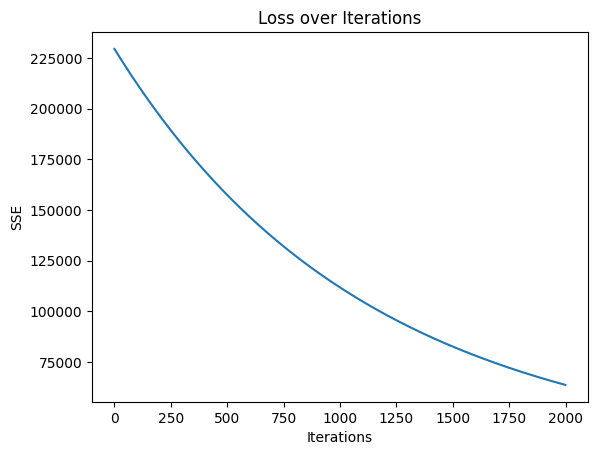

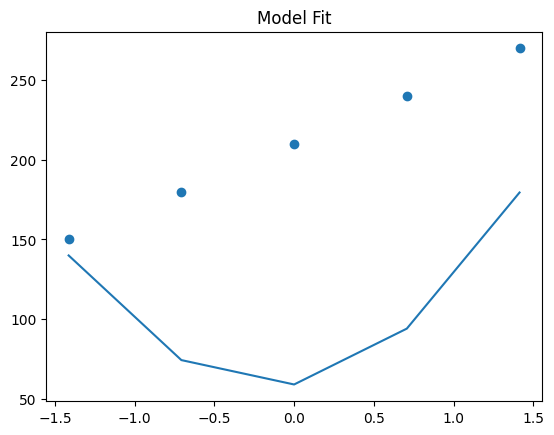

In [33]:
poly_model = LinearRegressionGD(
    learning_rate=0.0001,
    n_iters=2000,
    degree=2
)

poly_model.fit(X, y)
poly_model.plot_training(X, y)

In [34]:
ridge_model = LinearRegressionGD(
    learning_rate=0.0001,
    n_iters=2000,
    degree=2,
    regularization='ridge',
    lambda_=0.1
)

ridge_model.fit(X, y)
print(ridge_model.theta)

[57.80441798 13.73052571 49.62857856]


In [35]:
lasso_model = LinearRegressionGD(
    learning_rate=0.0001,
    n_iters=2000,
    degree=2,
    regularization='lasso',
    lambda_=0.1
)

lasso_model.fit(X, y)
print(lasso_model.theta)

[58.81032002 13.97179493 50.42580666]


In [37]:
X_mean = np.mean([50, 60, 70, 80, 90])
X_std = np.std([50, 60, 70, 80, 90])
X_70_norm = (70 - X_mean) / X_std
pred = model.predict([X_70_norm])
print("Predicted price:", pred[0])

Predicted price: 181.63645028619644


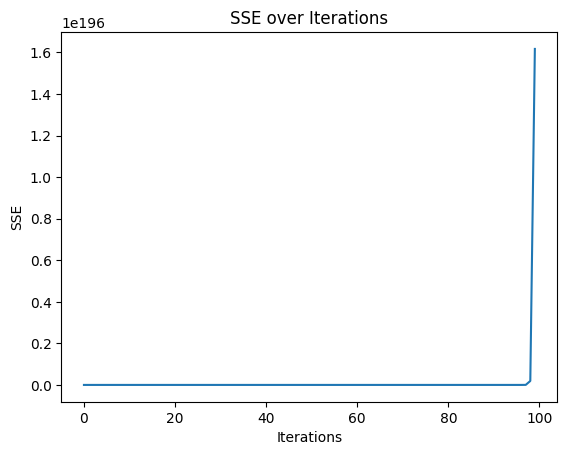

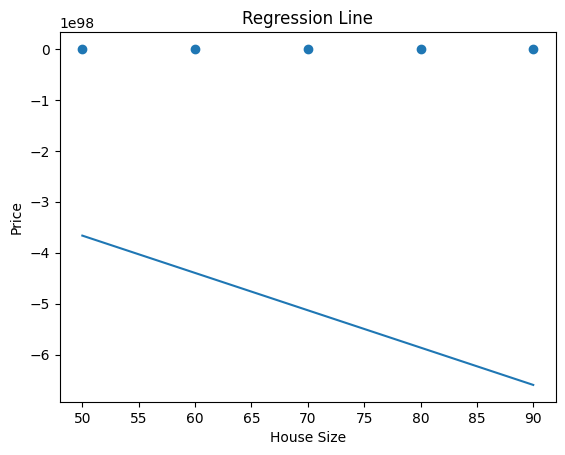

In [ ]:
model.plot_training(X, y)

In [ ]:
model_large = LinearRegressionGD(learning_rate=0.1, n_iters=100)
model_large.fit(X, y)

C:\Users\jawad\AppData\Local\Temp\ipykernel_18660\3289271179.py:27: RuntimeWarning: overflow encountered in square
  sse = np.sum(error ** 2)


In [ ]:
model_small = LinearRegressionGD(learning_rate=0.000001, n_iters=100)
model_small.fit(X, y)

In [ ]:
def mse(self, X, y):
    y_pred = self.predict(X)
    return np.mean((y - y_pred) ** 2)

In [ ]:
X_norm = (X - np.mean(X)) / np.std(X)
